In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pickle
import warnings
import pingouin as pg
import scipy.stats as stats
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')

In [2]:
#Loading COHA time series data
ts_df = pd.read_csv('./data/SWOW_prediction/eval/time_series/ts_df.csv')
ts_df = ts_df.groupby(['words','year','property'])[['count','outputs_z']].mean().reset_index()
ts_df['property_z'] = ts_df['outputs_z']


In [3]:
#Loading sentiment data
sent_df = pd.read_csv('./data/SWOW_prediction/eval/coha_sentiments.csv')

In [4]:
sent_df.head()

,words,sentiments,year
0,fedex,0.9919,1900
1,fuhrer,0.9524,2000
2,nike,0.9493,1890
3,gae,0.9359,1970
4,hitler,0.9287,1860


In [5]:
ts_df = ts_df.merge(sent_df, on=['words','year'], how='left')

In [6]:
ts_df.sample()

,words,year,property,count,outputs_z,property_z,sentiments
318733,tiptoe,1890,previous_link,103.0,-0.929275,-0.929275,0.136598


### Correlation between moral relevance and sentiment

In [7]:
rel_df = ts_df[ts_df['property'] == 'previous_link'].dropna()

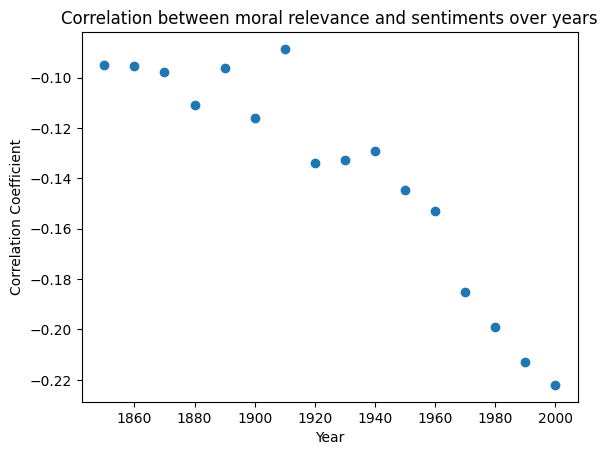

In [8]:
year_dfs = {year: rel_df[rel_df['year'] == year] for year in rel_df['year'].unique()}
year_correlations = {year: pearsonr(df['outputs_z'], df['sentiments']) for year, df in year_dfs.items()}
# Plotting the correlations
plt.scatter(year_correlations.keys(), [corr[0] for corr in year_correlations.values()], marker='o')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Year')
plt.title('Correlation between moral relevance and sentiments over years')
plt.show()

In [9]:
rel_df = rel_df.groupby('words').agg({'outputs_z': 'mean', 'sentiments': 'mean'}).reset_index()
pearsonr(rel_df['outputs_z'], rel_df['sentiments']),len(rel_df)

(PearsonRResult(statistic=-0.1395099700716067, pvalue=7.628866146508915e-91),
 20788)

### Correlation between moral polarity and sentiment

In [10]:
pol_df = ts_df[ts_df['property'] == 'polarity'].dropna()


In [11]:
len(pol_df)

169728

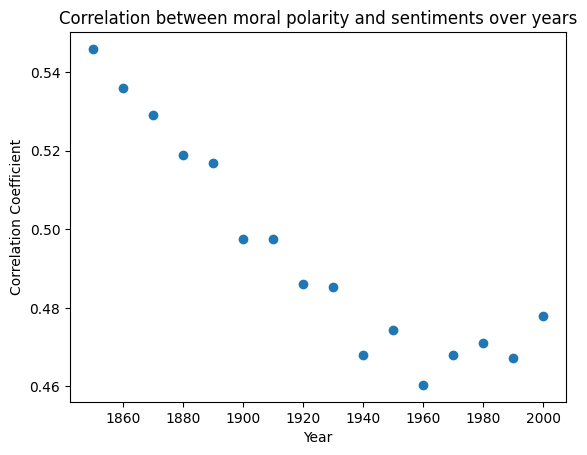

In [12]:
year_dfs = {year: pol_df[pol_df['year'] == year] for year in pol_df['year'].unique()}
year_correlations = {year: pearsonr(df['outputs_z'], df['sentiments']) for year, df in year_dfs.items()}
# Plotting the correlations
plt.scatter(year_correlations.keys(), [corr[0] for corr in year_correlations.values()], marker='o')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Year')
plt.title('Correlation between moral polarity and sentiments over years')
plt.show()

In [13]:
pol_df = pol_df.groupby('words').agg({'outputs_z': 'mean', 'sentiments': 'mean'}).reset_index()
pearsonr(pol_df['outputs_z'], pol_df['sentiments']),len(pol_df)

(PearsonRResult(statistic=0.44529104842763034, pvalue=0.0), 20788)